# S6 Demo Trabajo con mapas

En este notebook vamos a probar elementos básicos de la visualización en mapas

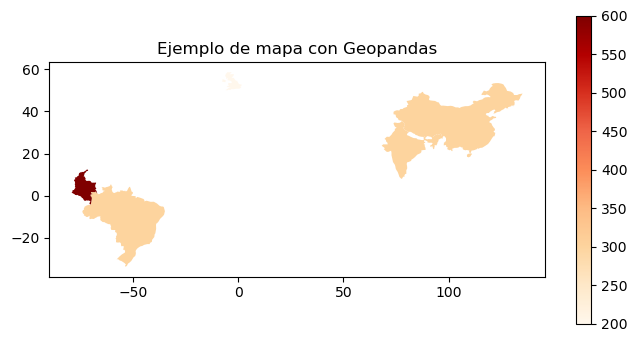

In [17]:
# https://geopandas.org/en/stable/

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar datos geográficos (shapefile, GeoJSON, etc.) en un GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Crear un DataFrame de ejemplo con datos para cada país
data = {'Country': ['India', 'United States', 'China', 'Brazil', 'United Kingdom', "Colombia"],
        'Value': [300, 300, 300, 300, 200, 600]}
df = pd.DataFrame(data)

# Hacer un merge entre el DataFrame con datos y el GeoDataFrame
merged = world.merge(df, left_on='name', right_on='Country')

# Visualizar el mapa
fig, ax = plt.subplots(figsize=(8, 4))
merged.plot(column='Value', cmap='OrRd', legend=True, ax=ax)
plt.title('Ejemplo de mapa con Geopandas')
plt.show()

## Visualización en Colombia

Cómo podemos hacerlo, primero usando información general (Kaggle)

https://www.kaggle.com/datasets/danielvm/coordenadas-decimales-de-ciudades-de-colombia

O directamente usando datos de DANE

https://geoportal.dane.gov.co/servicios/descarga-y-metadatos/datos-geoestadisticos/?cod=4

In [18]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar datos geográficos de Colombia en un GeoDataFrame
colombia = gpd.read_file('SHP_MGN2018_INTGRD_DEPTO/MGN_ANM_DPTOS.shp', encoding="UTF-8") ## Probar sin encoding
colombia.tail(2)

,DPTO_CCDGO,DPTO_CNMBR,VERSION,AREA,LATITUD,LONGITUD,STCTNENCUE,STP3_1_SI,STP3_2_NO,STP3A_RI,...,STP34_9_ED,STP51_PRIM,STP51_SECU,STP51_SUPE,STP51_POST,STP51_13_E,STP51_99_E,Shape_Leng,Shape_Area,geometry
31,73,TOLIMA,2018,2.413940e+10,4.034773,-75.255827,648829.0,8527.0,640302.0,8527.0,...,33115.0,418797.0,467142.0,164286.0,24120.0,58496.0,16978.0,9.549726,1.965027,"POLYGON ((-74.82173 5.31671, -74.82156 5.31653..."
32,08,ATLÁNTICO,2018,3.315752e+09,10.677010,-74.965219,753414.0,0.0,753414.0,0.0,...,45728.0,562823.0,986492.0,472743.0,43076.0,69822.0,27396.0,2.540635,0.273930,"POLYGON ((-74.84946 11.09778, -74.84938 11.097..."


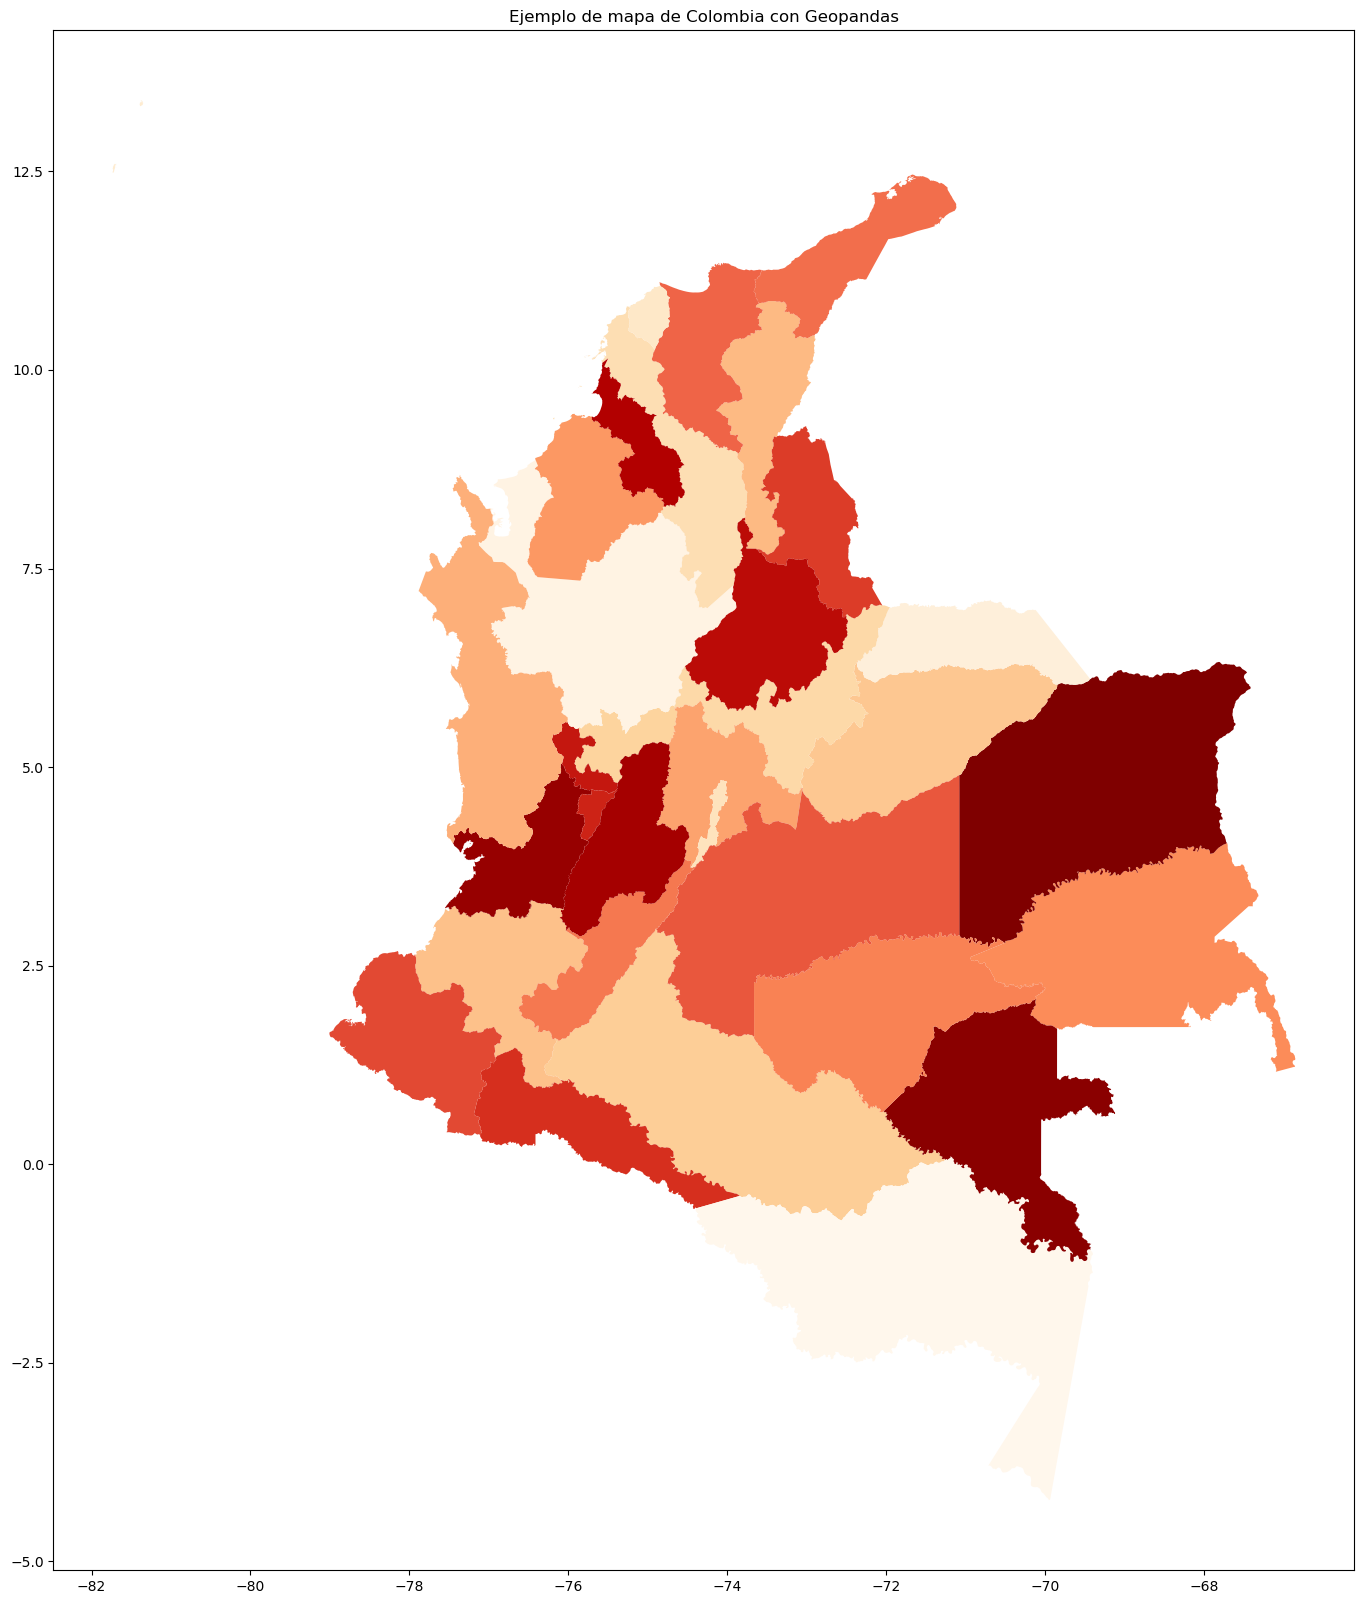

In [24]:
# Visualizar el mapa de Colombia con sus departamentos
fig, ax = plt.subplots(figsize=(20, 20))
colombia.plot(column='DPTO_CNMBR', cmap='OrRd', legend=False, ax=ax)
plt.title('Ejemplo de mapa de Colombia con Geopandas')
plt.show()

In [25]:
# Crear un DataFrame de ejemplo con datos para cada departamento
data = {'Departamento': ['HUILA', 'META', 'VALLE DEL CAUCA', 'PUTUMAYO', 'CAUCA', 'ATLÁNTICO', 'TOLIMA', 'SANTANDER' ],
        'Value': [100, 100, 500, 100, 200, 100, 100, 100]}
df = pd.DataFrame(data)

# Hacer un merge entre el DataFrame con datos y el GeoDataFrame de Colombia
merged = colombia.merge(df, left_on='DPTO_CNMBR', right_on='Departamento')
merged['Value'] = 100
merged.head(2)

,DPTO_CCDGO,DPTO_CNMBR,VERSION,AREA,LATITUD,LONGITUD,STCTNENCUE,STP3_1_SI,STP3_2_NO,STP3A_RI,...,STP51_SECU,STP51_SUPE,STP51_POST,STP51_13_E,STP51_99_E,Shape_Leng,Shape_Area,geometry,Departamento,Value
0,19,CAUCA,2018,3.124291e+10,2.396834,-76.824233,622959.0,83033.0,539926.0,70827.0,...,449016.0,126327.0,18944.0,56673.0,17057.0,13.950263,2.534419,"POLYGON ((-76.45922 3.32872, -76.45878 3.32870...",CAUCA,100
1,86,PUTUMAYO,2018,2.597628e+10,0.452260,-75.855912,147797.0,4704.0,143093.0,4659.0,...,107564.0,27821.0,4283.0,11058.0,5630.0,12.707922,2.107965,"POLYGON ((-76.67050 1.46732, -76.67000 1.46730...",PUTUMAYO,100


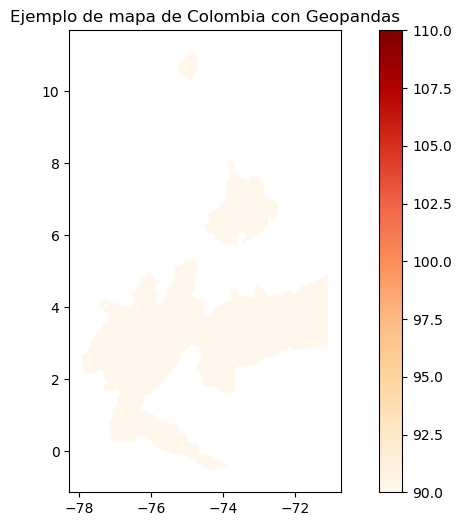

In [26]:
# Visualizar el mapa de Colombia con sus departamentos
fig, ax = plt.subplots(figsize=(10, 6))
merged.plot(column='Value', cmap='OrRd', legend=True, ax=ax)
plt.title('Ejemplo de mapa de Colombia con Geopandas')
plt.show()